Построю модель rf для датасета с погодой


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ochid7/predict-the-weather")

print("Path to dataset files:", path)

C:\Users\foksm\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\foksm\.cache\kagglehub\datasets\ochid7\predict-the-weather\versions\1


основные библеотеки:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
path = 'weather_data.csv'
data = pd.read_csv(path)
data.columns

Index(['ghi', 'dhi', 'precip', 'timestamp_utc', 'temp', 'app_temp', 'dni',
       'snow_depth', 'wind_cdir', 'rh', 'pod', 'pop', 'ozone', 'clouds_hi',
       'clouds', 'vis', 'wind_spd', 'wind_cdir_full', 'slp', 'datetime', 'ts',
       'pres', 'dewpt', 'uv', 'clouds_mid', 'wind_dir', 'snow', 'clouds_low',
       'solar_rad', 'wind_gust_spd', 'timestamp_local', 'description(output)',
       'code', 'icon'],
      dtype='object')

In [5]:
data.head()

,ghi,dhi,precip,timestamp_utc,temp,app_temp,dni,snow_depth,wind_cdir,rh,...,clouds_mid,wind_dir,snow,clouds_low,solar_rad,wind_gust_spd,timestamp_local,description(output),code,icon
0,0,0,0.0,2025-01-15T12:00:00,25.9,18.7,0,0,NNW,51,...,0,350,0,0,0.00000,11.9,2025-01-15T07:00:00,Few clouds,801,c02n
1,385,87,0.0,2025-01-15T15:00:00,29.3,22.8,748,0,NNW,41,...,0,360,0,0,384.62994,11.9,2025-01-15T10:00:00,Clear Sky,800,c01d
2,542,101,0.0,2025-01-15T18:00:00,36.5,32.0,831,0,NNW,30,...,0,340,0,0,542.37920,9.6,2025-01-15T13:00:00,Few clouds,801,c02d
3,193,65,0.0,2025-01-15T21:00:00,38.3,35.6,581,0,NW,28,...,0,310,0,0,192.98000,6.9,2025-01-15T16:00:00,Clear Sky,800,c01d
4,0,0,0.0,2025-01-16T00:00:00,29.3,27.5,0,0,W,46,...,0,280,0,0,0.00000,2.0,2025-01-15T19:00:00,Few clouds,801,c02n


In [6]:
y = data['description(output)']
X = data[['ghi', 'dhi', 'precip', 'timestamp_utc', 'temp', 'app_temp', 'dni', 'wind_cdir', 'rh']]

сделаю дату и направление ветра категориальными данными

In [7]:
X['timestamp_utc']

0     2025-01-15T12:00:00
1     2025-01-15T15:00:00
2     2025-01-15T18:00:00
3     2025-01-15T21:00:00
4     2025-01-16T00:00:00
5     2025-01-16T03:00:00
6     2025-01-16T06:00:00
7     2025-01-16T09:00:00
8     2025-01-16T12:00:00
9     2025-01-16T15:00:00
10    2025-01-16T18:00:00
11    2025-01-16T21:00:00
12    2025-01-17T00:00:00
13    2025-01-17T03:00:00
14    2025-01-17T06:00:00
15    2025-01-17T09:00:00
16    2025-01-17T12:00:00
17    2025-01-17T15:00:00
18    2025-01-17T18:00:00
19    2025-01-17T21:00:00
20    2025-01-18T00:00:00
21    2025-01-18T03:00:00
22    2025-01-18T06:00:00
23    2025-01-18T09:00:00
24    2025-01-18T12:00:00
25    2025-01-18T15:00:00
26    2025-01-18T18:00:00
27    2025-01-18T21:00:00
28    2025-01-19T00:00:00
29    2025-01-19T03:00:00
30    2025-01-19T06:00:00
31    2025-01-19T09:00:00
32    2025-01-19T12:00:00
33    2025-01-19T15:00:00
34    2025-01-19T18:00:00
35    2025-01-19T21:00:00
36    2025-01-20T00:00:00
37    2025-01-20T03:00:00
38    2025-0

In [8]:
def make_cat(time):
    if time[11:13] == '00':
        return 0
    elif time[11:13] == '03':
        return 1
    elif time[11:13] == '06':
        return 2
    elif time[11:13] == '09':
        return 3
    elif time[11:13] == '12':
        return 4
    elif time[11:13] == '15':
        return 5
    elif time[11:13] == '18':
        return 6
    elif time[11:13] == '21':
        return 7

X['timestamp_utc'] = X['timestamp_utc'].apply(make_cat)

C:\Users\foksm\AppData\Local\Temp\ipykernel_6528\1987262666.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['timestamp_utc'] = X['timestamp_utc'].apply(make_cat)


In [9]:
import category_encoders as ce

In [10]:
categorial = ce.OrdinalEncoder(cols=['wind_cdir'])
X['wind_cdir'] = categorial.fit_transform(X['wind_cdir'])

C:\Users\foksm\AppData\Local\Temp\ipykernel_6528\1481972065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['wind_cdir'] = categorial.fit_transform(X['wind_cdir'])


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
rf_model_1 = RandomForestClassifier()
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, random_state=10)
train_y.describe()

count             32
unique             7
top       Few clouds
freq              14
Name: description(output), dtype: object

<Axes: ylabel='description(output)'>

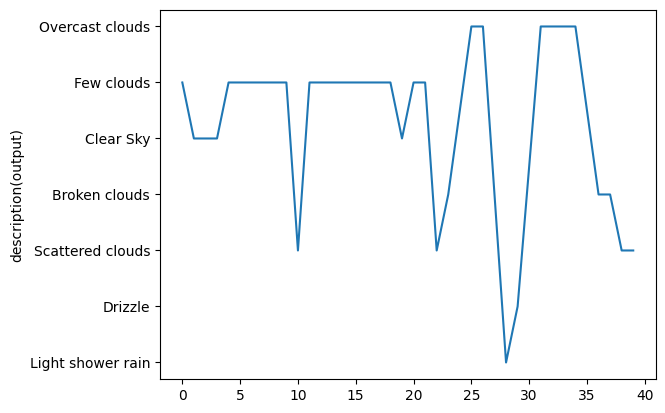

In [13]:
sns.lineplot(train_y)

In [14]:
rf_model_1.fit(train_X, train_y)
predict_1 = rf_model_1.predict(val_X)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(classification_report(val_y, predict_1))

                  precision    recall  f1-score   support

   Broken clouds       0.00      0.00      0.00         1
       Clear Sky       0.00      0.00      0.00         0
         Drizzle       0.00      0.00      0.00         1
      Few clouds       0.75      0.75      0.75         4
 Overcast clouds       0.50      0.50      0.50         2
Scattered clouds       0.00      0.00      0.00         0

        accuracy                           0.50         8
       macro avg       0.21      0.21      0.21         8
    weighted avg       0.50      0.50      0.50         8



c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packag

<Axes: >

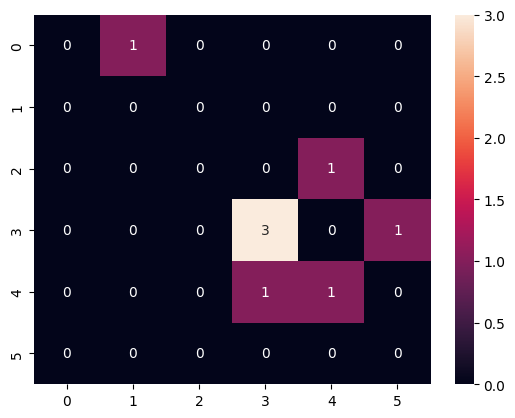

In [17]:
sns.heatmap(confusion_matrix(val_y, predict_1), annot=True)

accuracy - 0.62, 5 из 8 предположений верны


попробую масшабировать данные

In [18]:
ss = StandardScaler()
train_X_sc = ss.fit_transform(train_X)
val_X_sc = ss.transform(val_X)
val_X_sc

array([[ 1.89218742,  1.59868629, -0.40796742,  1.14735257, -0.08419431,
        -0.32399358,  1.53431575, -1.03881673, -1.82972539],
       [ 0.26362116,  0.78146646,  2.55906835,  1.58443926,  1.20054846,
         1.26939541,  0.87867846,  0.37574222,  1.0427789 ],
       [ 0.28283728,  0.8048156 , -0.40796742,  1.58443926,  1.12570908,
         1.20479856,  0.88974406, -1.03881673,  0.65977833],
       [-0.71159698, -0.75957665,  0.77884689, -0.6009942 ,  0.61430662,
         0.79568517, -0.76456437,  0.02210248,  1.52152961],
       [-0.71159698, -0.75957665, -0.40796742, -0.6009942 , -0.37107862,
        -0.42088886, -0.76456437,  1.0830217 ,  0.46827804],
       [-0.71159698, -0.75957665, -0.40796742, -1.03808089, -0.08419431,
        -0.13020303, -0.76456437, -0.33153726,  0.32465283],
       [-0.71159698, -0.75957665, -0.40796742, -0.16390751, -1.83044662,
        -1.62669674, -0.76456437,  0.02210248, -0.24984803],
       [-0.71159698, -0.75957665, -0.40796742,  0.27317918, -0

In [19]:
rf_model_2 = RandomForestClassifier()
rf_model_2.fit(train_X_sc, train_y)
predict_2 = rf_model_2.predict(val_X_sc)

<Axes: >

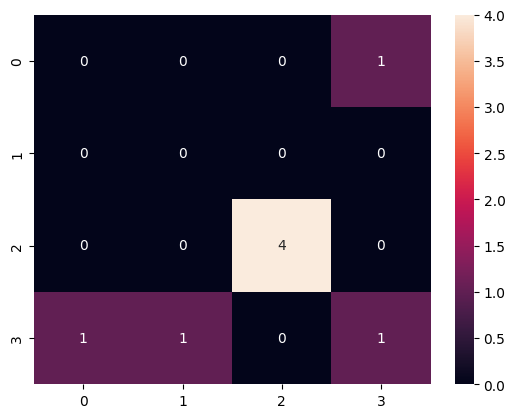

In [20]:
sns.heatmap(confusion_matrix(predict_2, val_y), annot=True)

In [21]:
print(classification_report(val_y, predict_2))

                 precision    recall  f1-score   support

  Broken clouds       0.00      0.00      0.00         1
        Drizzle       0.00      0.00      0.00         1
     Few clouds       1.00      1.00      1.00         4
Overcast clouds       0.33      0.50      0.40         2

       accuracy                           0.62         8
      macro avg       0.33      0.38      0.35         8
   weighted avg       0.58      0.62      0.60         8



c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


точность - 0.5, меньше чем без масшабирования, продолжу использовать масшабированные данные

<Axes: ylabel='None'>

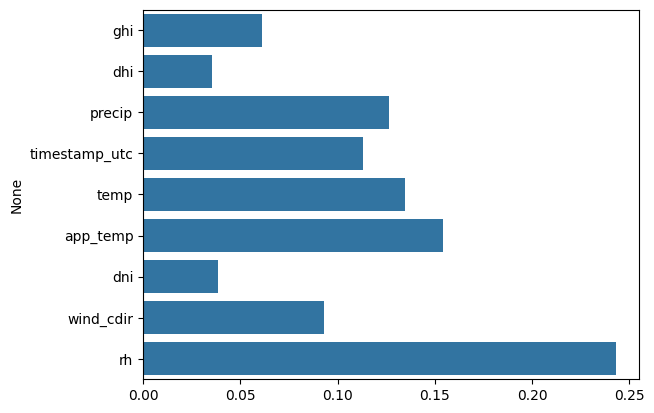

In [31]:
imp_2 = rf_model_2.feature_importances_
sns.barplot(x=imp_2, y=train_X.columns)

использую pca тест, чтобы узнать важность признаков

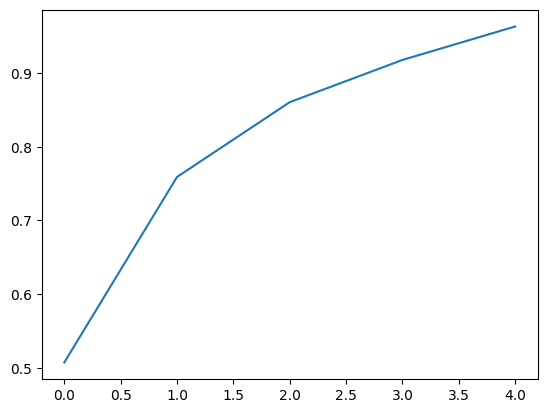

In [36]:
from sklearn.decomposition import PCA
import numpy as np
pca_test = PCA(n_components=5)
pca_test.fit(train_X_sc)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))

>90% дисперсии объясняют 5 признаков, соответсвенно, остальные исключу

In [43]:
train_X_pca = pca_test.transform(train_X_sc)
val_X_pca = pca_test.transform(val_X_sc)

In [45]:
rf_model_3 = RandomForestClassifier()
rf_model_3.fit(train_X_pca, train_y)
predict_3 = rf_model_3.predict(val_X_pca)

<Axes: >

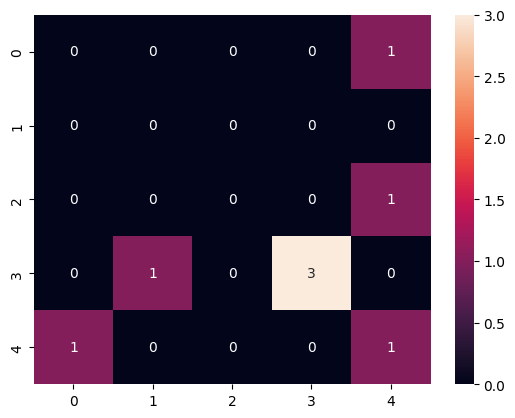

In [47]:
sns.heatmap(confusion_matrix(val_y, predict_3), annot=True)